## Highest Symptom Model in Diabetic Patients With Logistic Regression

In [1]:
"""Attributes:

Dataset information:

This dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases.
Several constraints were placed on the selection of these instances from a larger database. 
In particular, all patients here are females at least 21 years old of Pima Indian heritage.


Pregnancies: Number of times pregnant

Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test

BloodPressure: Diastolic blood pressure (mm Hg)

SkinThickness: Triceps skin fold thickness (mm)

Insulin: 2-Hour serum insulin (mu U/ml)

BMI: Body mass index (weight in kg/(height in m)^2)

DiabetesPedigreeFunction: Diabetes pedigree function

Age: Age (years)

Outcome: Class variable (0 or 1)

"""

'Attributes:\n\nDataset information:\n\nThis dataset is originally from the National Institute of Diabetes and Digestive and Kidney Diseases.\nSeveral constraints were placed on the selection of these instances from a larger database. \nIn particular, all patients here are females at least 21 years old of Pima Indian heritage.\n\n\nPregnancies: Number of times pregnant\n\nGlucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test\n\nBloodPressure: Diastolic blood pressure (mm Hg)\n\nSkinThickness: Triceps skin fold thickness (mm)\n\nInsulin: 2-Hour serum insulin (mu U/ml)\n\nBMI: Body mass index (weight in kg/(height in m)^2)\n\nDiabetesPedigreeFunction: Diabetes pedigree function\n\nAge: Age (years)\n\nOutcome: Class variable (0 or 1)\n\n'

**1)** Import library yang diperlukan untuk projek pada modul ini. Pada modul ini kita akan import list library seperti gambar dibawah

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LogisticRegression

**2)** Uduh dataset yang akan kita gunakan dari [ https://www.kaggle.com/uciml/pima-indians-diabetes-database/data ], kemudian jadikan satu folder dengan notebook yang kita gunakan. Gunakan fungsi Pandas untuk membaca dataset, dan simpan hasil pembacaan di variabel diabetesDF 

In [3]:
diabetesDF = pd.read_csv('diabetes.csv')

**3)** Gunakan fungsi head pada Pandas, untuk membaca isi dari dataset yang diuduh

In [4]:
diabetesDF.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


**4)** Kita akan mencari nilai yang hilang, dengan melakukan looping untuk mencari simbol tanda tanya, kemudian kita akan menggantinya dengan nilai null. False akan melambambangkan tidak ada null, dan True akan melambangkan null yang berarti data tersebut tidak ada nilainya

In [5]:
diabetesDF.replace("?", np.nan, inplace = True)

In [6]:
missing_data = diabetesDF.isnull()

In [7]:
for column in missing_data.columns.values.tolist():
    print(column)
    print(missing_data[column].value_counts())
    print("")

Pregnancies
False    768
Name: Pregnancies, dtype: int64

Glucose
False    768
Name: Glucose, dtype: int64

BloodPressure
False    768
Name: BloodPressure, dtype: int64

SkinThickness
False    768
Name: SkinThickness, dtype: int64

Insulin
False    768
Name: Insulin, dtype: int64

BMI
False    768
Name: BMI, dtype: int64

DiabetesPedigreeFunction
False    768
Name: DiabetesPedigreeFunction, dtype: int64

Age
False    768
Name: Age, dtype: int64

Outcome
False    768
Name: Outcome, dtype: int64



**5)** Kita akan melakukan split pada *dataset* yang kita unduh, dataset yang diuduh memiliki 768 data. Kita akan bagi masing-masing data, dengan percentase 80% akan dialokiasikan pada train data, dan 20 % akan dialokasikan pada test data.

In [9]:
dfTrain = diabetesDF[:613]
dfTest = diabetesDF[614:767] 

**6)** Kita akan memisahkan label, dan fitur data pada bagian yang digunakan untuk Train dan Test. Kemudian kita akan konversikan menjadi bentuk Numpy Array agar bisa diterima model, label akan berisi outcome berdasarkan gejala-gelaja yang terdapat di gejala pasien, sementara data akan berisi nilai dari gejala-gejala pada setiap pasien

In [10]:
trainLabel = np.asarray(dfTrain['Outcome'])
trainData = np.asarray(dfTrain.drop('Outcome',1))
testLabel = np.asarray(dfTest['Outcome'])
testData = np.asarray(dfTest.drop('Outcome',1))


**7)** Sekarang kita akan melakukan normalisasi pada train dan test data. Ini juga akan memudahkan kita untuk memahami pentingnya setiap fitur yang dianalisa, dan akan terlihat saat kita akan melihat bobot model. Kita akan menormalkan data sedemikian rupa sehingga setiap variabel memiliki rata-rata 0 dan standar deviasi 1

In [11]:
# Normalize the data 
means = np.mean(trainData, axis=0)
stds = np.std(trainData, axis=0)

trainData = (trainData - means)/stds
testData = (testData - means)/stds

# means = np.mean(trainData, axis=0)
# stds = np.std(trainData, axis=0)

**8)** Sekarang kita akan melakukan *train model* dengan *Logistic Regression*. Jika pada modul sebelumnya, kita menggunakan linear regression, pada modul ini kita menggunakan *Logistic Regression* 

In [12]:
diabetesCheck = LogisticRegression()
diabetesCheck.fit(trainData,trainLabel)
accuracy = diabetesCheck.score(testData,testLabel)
print("accuracy = ",accuracy * 100,"%")

accuracy =  77.12418300653596 %


**9)** Kemudian kita akan mengambil koefisien-koefisien yang dihasilkan oleh pelatihan dengan dataset dengan logistic regression, yang dilakukan sebelumnya. Nilai koefisien yang dihasilkan, akan kita simpan

In [13]:
coeff = list(diabetesCheck.coef_[0])
coeff

[0.4033431541928464,
 1.0569388276314948,
 -0.1985620869109347,
 -0.039043993148244034,
 -0.09599367455555358,
 0.8008181382199369,
 0.3568119130224063,
 0.11133034047275302]

**10)** Kemudian kita akan menghilangkan *row* untuk bagian *outcome*, karena disini kita ingin melihat gejala yang mempengaruhi kemungkinan pasien diabates. *Outcome* tidak diperlukan

In [14]:
labels = list(dfTrain.drop('Outcome',1).columns)
labels

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'BMI',
 'DiabetesPedigreeFunction',
 'Age']

**11)** Kita akan melakukan plot dengan bar graph, menggunakan nilai-nilai koefisien yang dihasilkan. Setiap nilai koefisien, akan menentukan pengaruhnya pada pasien yang terkena diabetes 

Text(0.5, 0, 'Importance')

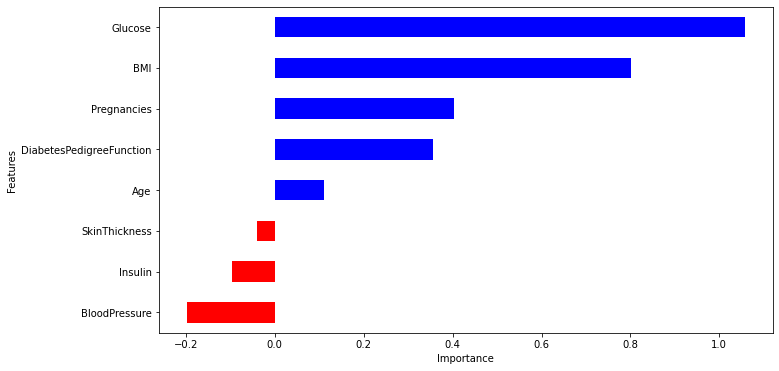

In [15]:
features = pd.DataFrame()
features['Features'] = labels
features['importance'] = coeff
features.sort_values(by=['importance'], ascending=True, inplace=True)
features['positive'] = features['importance'] > 0
features.set_index('Features', inplace=True)
features.importance.plot(kind='barh', figsize=(11, 6),color = 
                         features.positive.map({True: 'Blue', False: 'red'}))
plt.xlabel('Importance')